In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


## Feature Scaling
Feature scaling is the process of transforming the features in a dataset to ensure they have comparable scales. This helps machine learning models converge faster and perform better, especially those sensitive to feature magnitudes (e.g., gradient descent, KNN, SVM).



### Standardization
- Definition: Centers the feature values around 0 with a standard deviation of 1.
                𝑧=(𝑥−𝜇)/𝜎    , where 𝜇 is the mean and 𝜎 is the standard deviation.

- Use Case: Works well for data that follows a Gaussian distribution but is robust to outliers.

​


In [4]:
## For understanding the Standardization technique for Feature Scaling we will use Tips daataset from seaborn
df = sns.load_dataset("tips")
print(df.keys())
df

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 2:40

In [6]:
mean = np.mean(df["total_bill"])
mean 

19.78594262295082

In [7]:
std = np.std(df["total_bill"])
std

8.88415057777113

## 3:40

In [9]:
# Standardizing the data (Manually)
std_data = []
for x in list(df["total_bill"]):
    z_score = (x - mean)/std
    std_data.append(x)

print(std_data)

[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29, 16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 10.29, 34.81, 9.94, 25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, 41.19, 27.05, 16.43, 8.

In [10]:
df["std_total_bill"] = std_data

In [11]:
df

,total_bill,tip,sex,smoker,day,time,size,std_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,17.82


## 5:11

## feature Scaling is optional 
## Lets obsever the Total bill and Std total bill on dist plot

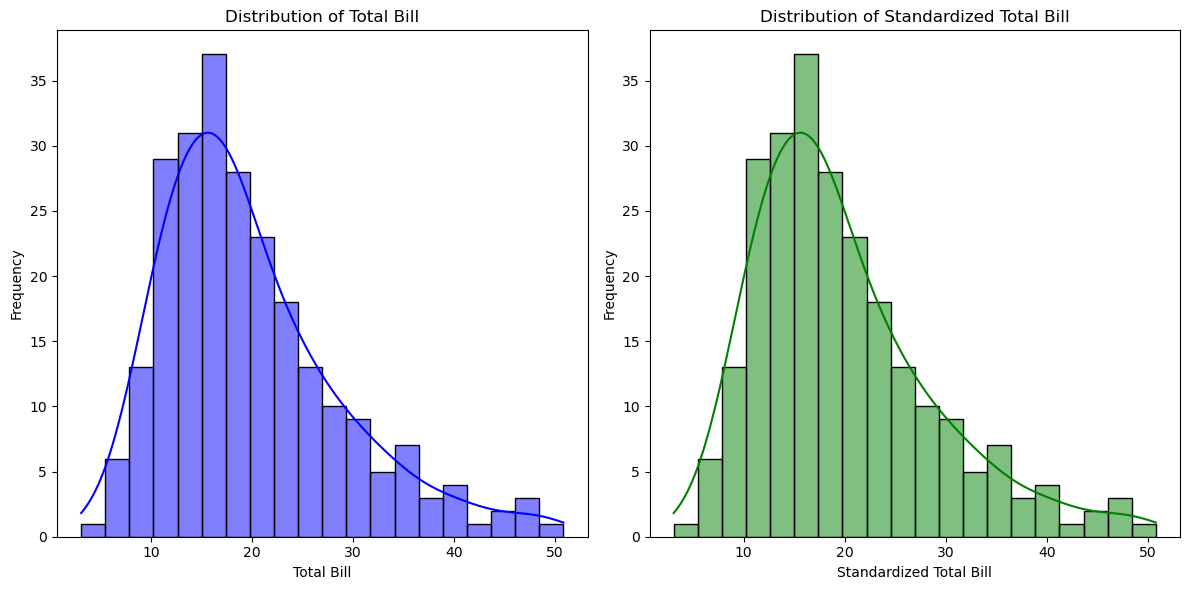

In [14]:

# Plotting the distributions side by side
plt.figure(figsize=(12, 6))

# Plot for total_bill
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(df["total_bill"], kde=True, bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

# Plot for std_total_bill
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(df["std_total_bill"], kde=True, bins=20, color='green', edgecolor='black')
plt.title("Distribution of Standardized Total Bill")
plt.xlabel("Standardized Total Bill")
plt.ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()

# 6:20

In [16]:
# Standardiztion of Data (Automatically)
from sklearn.preprocessing import StandardScaler
# in Standardizing the data manually we calculated the population mean and standard deviation values (first step)
# we applied the calculated values of the population mean and Standaard deviation values to find the zscore (second step)

In [17]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

# 8:42

In [19]:
# In the first step, we calculate the population mean and standard deviation values.
# This step is equivalent to the `.fit()` method in pre-built scaling libraries (e.g., Scikit-learn).

# In the second step, we apply the calculated population mean and standard deviation values 
# to compute the z-scores for standardization.
# This step is equivalent to the `.transform()` method in pre-built scaling libraries.


# 9.36

In [64]:
std_scaler.fit(df[["total_bill"]]) # it will calculate population mean (mu) and stad_deviation (sigma) at this point


StandardScaler()

In [68]:
std_scaler.transform(df[["total_bill"]]) # Appiying the mu and sigma to determine the values of zscores for total bill

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [70]:
df["z_scores_TotalBill"] = std_scaler.transform(df[["total_bill"]])

In [72]:
df

,total_bill,tip,sex,smoker,day,time,size,std_total_bill,z_scores_TotalBill
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59,0.540745
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,29.03,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,27.18,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,22.67,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,17.82,-0.221287


# 13:00

## You need to fit nd tranform the train data only 
## you need to only Tranform the test data 

In [74]:
## Now lets tranform a new data which could be considered as Test data or unseen data
std_scaler.transform([[25]])

C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.5868943]])

# 16:00

## Normalization (Min-Max Scaling)
- Definition: Scales the feature values to a fixed range, usually [0, 1].

  x ′= (x−x min)/(x max−x min)

- Use Case: Commonly used when feature magnitudes need to be bounded (e.g., image pixel values).


# 17:45

In [85]:
from sklearn.preprocessing import MinMaxScaler


In [87]:
min_max = MinMaxScaler()

In [89]:
min_max.fit_transform(df[["total_bill"]])

array([[0.29157939],
       [0.1522832 ],
       [0.3757855 ],
       [0.43171345],
       [0.45077503],
       [0.46543779],
       [0.11939673],
       [0.49874319],
       [0.25073314],
       [0.24528697],
       [0.15081693],
       [0.67427734],
       [0.25869292],
       [0.32174277],
       [0.24633431],
       [0.38772518],
       [0.15207373],
       [0.27691663],
       [0.29116045],
       [0.36824466],
       [0.31105991],
       [0.36070381],
       [0.2660243 ],
       [0.761416  ],
       [0.35085882],
       [0.30875576],
       [0.21575199],
       [0.20150817],
       [0.39023879],
       [0.34729786],
       [0.13573523],
       [0.32006703],
       [0.25115207],
       [0.36908253],
       [0.30812736],
       [0.43967323],
       [0.27733557],
       [0.29032258],
       [0.32718894],
       [0.59069962],
       [0.27167993],
       [0.30142438],
       [0.22769166],
       [0.13845832],
       [0.57247591],
       [0.31881022],
       [0.40134059],
       [0.614

In [91]:
df["Min_max_totalBill"] = min_max.fit_transform(df[["total_bill"]])

In [93]:
df

,total_bill,tip,sex,smoker,day,time,size,std_total_bill,z_scores_TotalBill,Min_max_totalBill
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99,-0.314711,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34,-1.063235,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01,0.137780,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68,0.438315,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59,0.540745,0.450775
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,29.03,1.040511,0.543779
240,27.18,2.00,Female,Yes,Sat,Dinner,2,27.18,0.832275,0.505027
241,22.67,2.00,Male,Yes,Sat,Dinner,2,22.67,0.324630,0.410557
242,17.82,1.75,Male,No,Sat,Dinner,2,17.82,-0.221287,0.308965


# 20:06

## Unit Vector Scaling

- Definition: Scales feature vectors to have a magnitude (or length) of 1.

            x ′= x/∥x∥   , where ∥x∥ is the Euclidean norm of the vector.
  
- Use Case: Useful in machine learning algorithms that calculate distances or angles, such as cosine similarity.
​
 


In [101]:
from sklearn.preprocessing import normalize

In [109]:
uv = normalize(df[["total_bill"]])

In [111]:
df["UV"] = uv

In [113]:
df

,total_bill,tip,sex,smoker,day,time,size,std_total_bill,z_scores_TotalBill,Min_max_totalBill,UV
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99,-0.314711,0.291579,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34,-1.063235,0.152283,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01,0.137780,0.375786,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68,0.438315,0.431713,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59,0.540745,0.450775,1.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,29.03,1.040511,0.543779,1.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,27.18,0.832275,0.505027,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,22.67,0.324630,0.410557,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,17.82,-0.221287,0.308965,1.0
